### Initialize the raw data

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd


I = [a/10 for a in range(15,23)]
I_err = [0.005 for a in range(15,23)]
P_S = [0.00000001, 29.4, 39.7, 40.6, 46.7, 51.0, 59.8, 73.0]
P_S_err = [0.1/2 for a in range(15,23)]
P_LD = [867,947,1021,1110,1181,1270,1334,1415]
P_LD_err = [1/2 for a in range(15,23)]

eta_S = [ P_S[a]/P_LD[a] for a in range(23-15) ]
eta_S_err = [ eta_S[a]*np.sqrt((P_S_err[a]/P_S[a])**2 + (P_LD_err[a]/P_LD[a])**2) for a in range(23-15) ]
P_S[0]=0
eta_S[0]=0
eta_S_err[0]=0

print(eta_S)
print(eta_S_err)

[0, 0.031045406546990496, 0.03888344760039177, 0.03657657657657658, 0.03954276037256563, 0.04015748031496063, 0.04482758620689655, 0.051590106007067135]
[0, 5.528418602260046e-05, 5.254340229067351e-05, 4.7963658432667026e-05, 4.552680763256459e-05, 4.242593781914077e-05, 4.107493300437032e-05, 3.9760955611094737e-05]


### Ready to plot it!

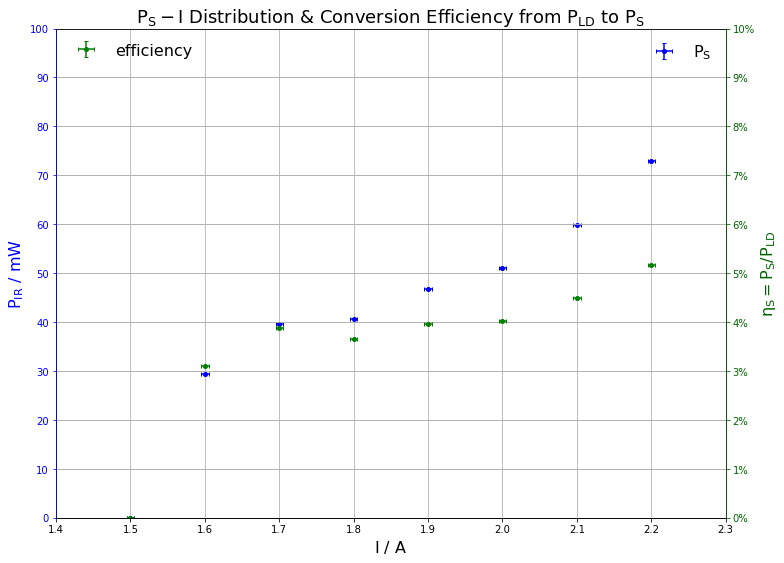

In [29]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
ax1.errorbar(I, P_S, xerr=I_err, yerr=P_S_err ,fmt='o', label=r'$\rm P_{S}$', color='blue', markersize=4, ecolor='blue', capsize=2)
ax1.legend(loc=1, frameon=False, fontsize=16)
ax1.set_ylabel(r'$\rm P_{IR}\ /\ mW$', fontsize=16, color="blue") 
ax1.set_xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax1.grid()
ax1.set_ylim(0,100)
#ax1.yaxis.label.set_color('red') 
ax1.tick_params(axis='y', colors='blue') 

ax2 = ax1.twinx()
ax2.errorbar(I, eta_S, xerr=I_err, yerr=eta_S_err,fmt='o', label='efficiency', color='green', markersize=4, ecolor='green', capsize=2)
ax2.legend(loc=2, frameon=False, fontsize=16)
ax2.set_ylim(0,0.1)
#ax2.set_xlim([0, np.e])
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)')
ax2.set_ylabel(r'$\rm \eta_S = P_{S}/P_{LD}$', fontsize=16, color="darkgreen")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax2.tick_params(axis='y', colors='darkgreen') 

x_major_locator=MultipleLocator(0.1)
y1_major_locator=MultipleLocator(10)
y2_major_locator=MultipleLocator(0.01)

ax1.xaxis.set_major_locator(x_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)
ax2.yaxis.set_major_locator(y2_major_locator)

plt.title(r"$\rm P_{S}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{S}$", fontsize=18)
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
plt.grid(True)
#plt.legend(loc='best', frameon=False)
plt.xlim(1.4,2.3)
#plt.ylim(-5,110)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
ax=plt.gca()
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('darkgreen')

plt.savefig('phyex4_fig.pdf')
plt.show()